In [1]:
#Por Uriel Cárdenas Aguilar
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from math import sqrt
import numpy as np 
from random import sample

Text(0, 0.5, 'Y')

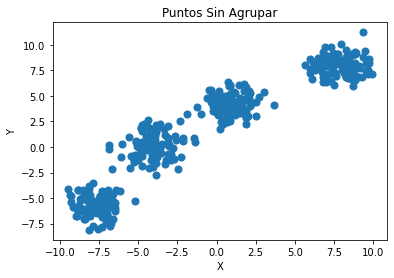

In [2]:
#Genera los puntos que se agruparan
#Este fragmento fue tomado de la clase de Machine Learning el dia Miercoles 27 de Enero del 2021 
#Impartida por el Doctor Luis Carlos Padierna
centros = 4
X, y_true = make_blobs(n_samples=400, centers=centros, cluster_std=1, random_state=3)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Puntos Sin Agrupar")
plt.xlabel("X")
plt.ylabel("Y")

In [3]:
#Funcion para encontrar la distancia minima entre los k centros y un solo punto, regresa una vector
#de ceros y con un uno que representa el centro al cual esta mas cercano el punto
def dis(lp_1,p_2):
    d = []
    for i in range(len(lp_1)):
        d.append((lp_1[i][0]-p_2[0])**2+(lp_1[i][1]-p_2[1])**2)
    u_min = np.where(d == np.amin(d))
    ubic = np.zeros(len(lp_1))
    ubic[u_min] = 1
    return ubic

In [5]:
#Algoritmo K-means, regresa los centros de cada grupo y un vector para saber que punto corresponde 
# a que grupo
def k_means(centros,p):
    k = len(centros)
    n = len(p)
    old_centros = []
    ur = 0
    for itera in range(40):
        lista = []
        old_centros = centros
        for i in range(n):
                aux = dis(centros,p[i])
                lista.append(aux) 
        for j in range(k):
            num = 0
            aux2 = 0
            for i in range(n):
                num += lista[i][j]
                aux2 += lista[i][j] * p[i]
            centros[j] = aux2/num
        if(centros == old_centros):
            color = []
            for r in range(n):
                for s in range(k):
                    if (lista[r][s] == 1):
                        color.append(s)
    return centros, color            

[array([-7.27733401, -4.89046953]), array([-3.32794185,  1.80341865]), array([0.41307295, 2.24848441]), array([-3.09249567,  0.24047413])]


Text(0, 0.5, 'Y')

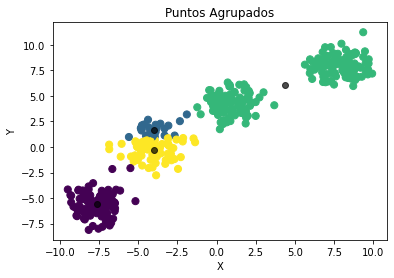

In [11]:
#Se crean de manera aleatoria los centros iniciales a utilizar en el algoritmo
C = sample(list(X),centros)
print(C)
Cen, colores = k_means(C,X)
x, y = zip(*Cen)
plt.scatter(X[:, 0], X[:, 1], c = colores, s=50, cmap='viridis');
plt.scatter(x, y,  c='black', alpha=0.7);
plt.title("Puntos Agrupados")
plt.xlabel("X")
plt.ylabel("Y")